## 1. Uv-Vis Spectroscopy 

After gold nanoparticles have been synthesized, it is useful to characterize them to determine their size and shape. There are many ways to do this, one of which is Uv-Vis Spectroscopy. Spectroscopy is the study of how matter interacts with electromagnetic radiation, and Uv-Vis referes to the type of electromagnetic radition that is used. Therefore, this technique uses light in the Uv-Visible range (different color of lights) to perform spectroscopy. Spectroscopy is useful because materials interact differently with light. Knowing how much light a material absorbs can be used as a way to identify the shape and size of it. The image below shows the basics of how this technique works. Light from a source enters a monochromator which splits the light into light of different wavelengths. Each wavelength of light, at a time, is allowed to be emitted to the sample. A detector is placed directly behind the sample to measure the amount of light that has been transmitted. 

<img src= "../images/Uv-vis.jpg" width = "700"/>

While the detector measures how much light is transmitted through the sample, a Uv-Vis spectrum shows how much light is absorbed by the sample. There is an inverse relationship between transmittance and absorbance, so high absorbances mean low transmittances and vice versa. The equation that relates transmittance and absorbance is the Beer Lambert Law:

<center> $A = log_{10}(T) = \epsilon l c$ </center>


- $A$ is the absorbance in arbitrary units, which is the spectrum
- $T$ is the transmittance, which is the ratio of light that passes throught the sample
- $\epsilon$ is the molar absorptivity coefficient, which is a function of wavelength and accounts for the shape of the spectrum
- $l$ is the path length of the light, which is the distance that light travels from the entrance to the exit of the sample
- $c$ is the concentration of the sample 

In the Beer Lambert Law, the absorbance is also equal to the product of the molar absorptivity coefficient, the path length of light, and the concentration of the sample. The molar absorptivity coefficient is the only term that is a function of wavelength, which means that it accounts for the shape of the spectrum. The path length and the concentration are constants that account for the position of the spectrum, but do not change the shape. Because of this, Uv-vis spectroscopy can also be used to measure the concentration of samples, by measuring the change in absorbance.  

The figure below shows two examples of Uv-Vis spectra of gold nanospheres and gold nanorods.

<img src= "../images/spectra.jpg" width = "700"/>

From the graphs above, it is evident that gold nanospheres and nanorods have different spectra, and this can be used to differentiate if our sample consists of rods or spheres. Spheres have one peak while rods have two peaks, as seen in the graphs. We can then compare the location of these peaks to those found in literature to determine the size of the nanoparticles. From literature, a single peak at 520 nm indicates that the spheres have a diameter of 15 nm [1], while two peaks at 530 nm and 780 nm indicates that the rods have a diameter of 10 nm and a length of 40 nm [2]. 

The Uv-vis spectra of a sample is also related to the color of it. From the spectra of the sphere, we can see that there is a lot of absorbance of light with wavelengths from 300-550 nm. This means that violet, blue, and green light get absorbed by the sample. The wavelengths that do not get absorbed are 600-800 nm which corresponds to red light. Since red light gets does not get absorbed, the sample appears red. For the spectrum of the nanorod, there is a lot of absorbance of light from 700 nm to 850 nm, which corresponds to red light. The wavelengths that do not get absorbed much are orange (600 nm), blue (450 nm) and violet (400 nm). Because of this, the sample has a rose gold color (a mixture of orange, blue, and violet). 

## 2. Plotting Uv-Vis Spectra

Now we will plot the Uv-Vis spectra of all the samples we synthesized. An automated plate reader will measure the spectra of all the samples that were made. After obtaining an excel sheet with all the spectra, rename the file "spectra.xlsx" and upload it to the folder called "Characterize Samples". Make sure that only the  Then run the code blocks below to plot all the spectra.

Questions to think about:
1. Does the color of the sample match the color determined by its spectra?
2. Can you differentiate between the spectra of rods and spheres?
3. How do the concentrations of Ascorbic Acid and Silver Nitrate affect the final concentration of the gold nanoparticles?

In [1]:
from Characterize_Samples import Uv_vis_data

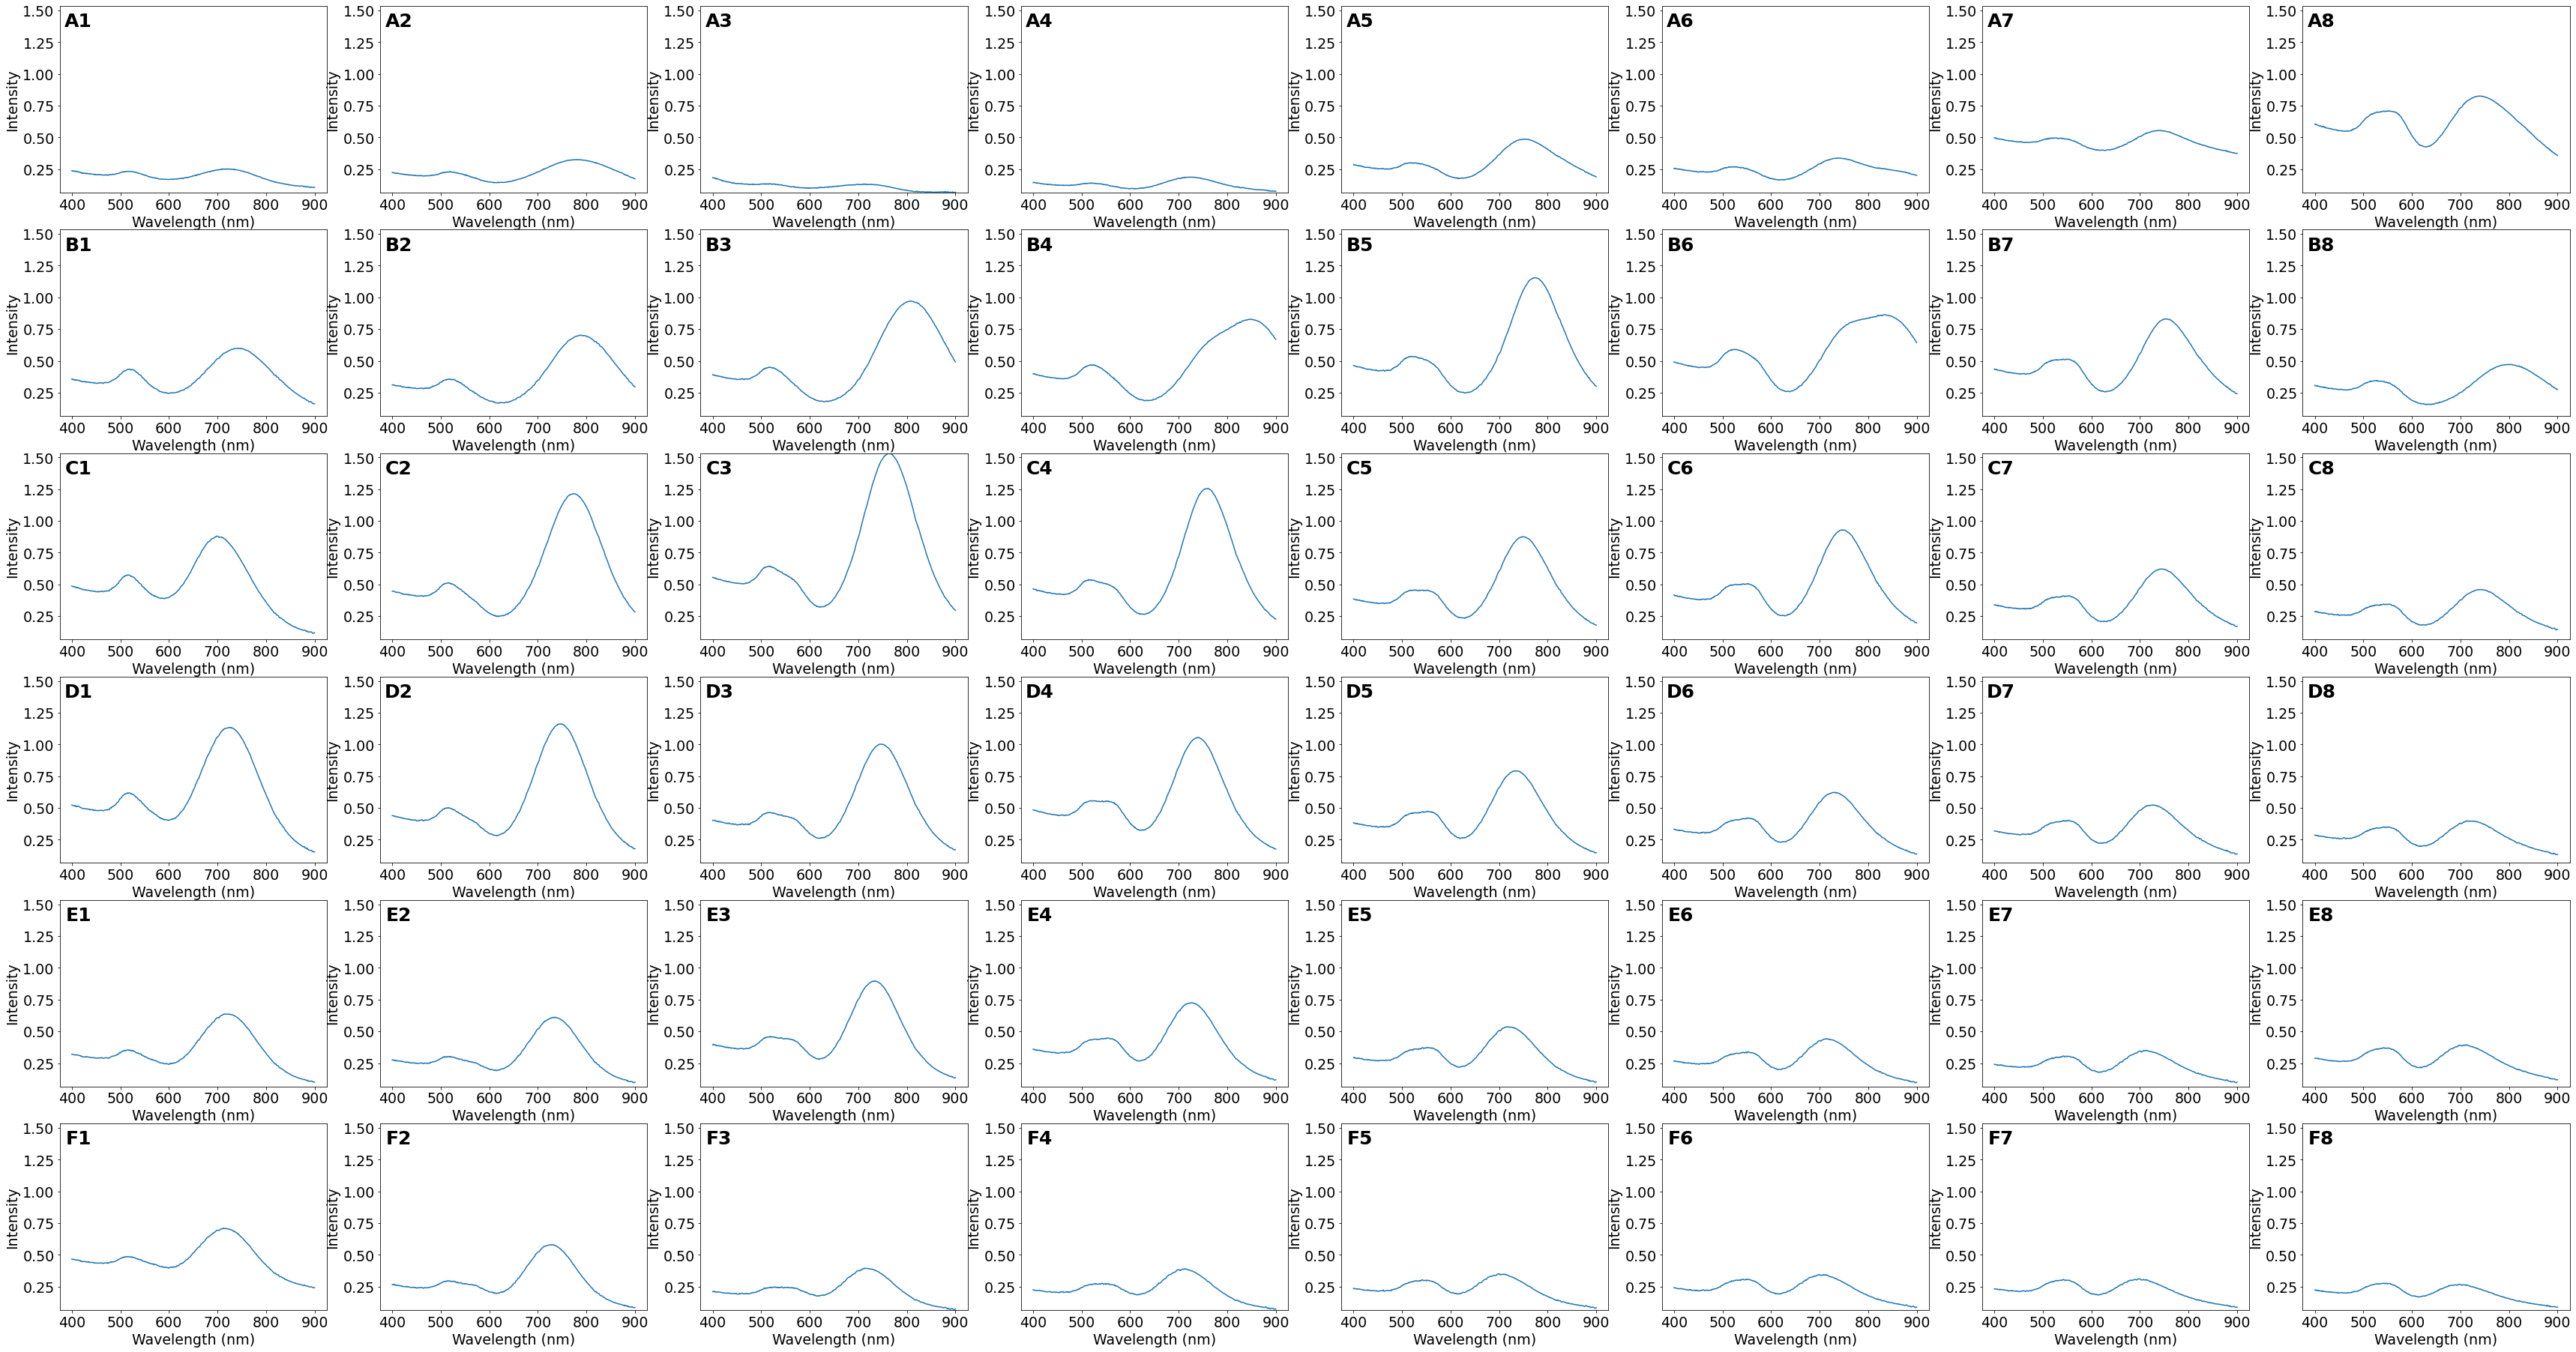

In [2]:
plot = Uv_vis_data.plot_data()
plot.load_data()
plot.plot_all_spectra(option = 1)

## 3. Simulating Uv-Vis Spectra

The Uv-vis data that comes from plate readers are experimental. Some disadvantages of experimental data are that they require sample preparation, which can be laborious and sample characterization, which can be time consuming. As an alternative, Uv-vis data can also be simulated which is based on solving theoretical electrodynamical models. These models simulate how electromagnetic radiation interacts with nanoparticles of a specific geometry, shape, and material. Given this information, a spectrum can be generated by numerical approximations of these meodels. Many toolkits can perform these simulations such as pyGDM, which is written in python and can be used for single metallic nanoparticles.

The code below allows us to perform the simulation of obtaining a spectrum from a nanosphere or a nanorod. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from pyGDM2 import  (structures, materials, core, 
                    linear, fields, propagators, 
                    tools)
matplotlib.rcParams.update({'font.size': 19})

In [2]:
def get_spectrum(geometry, step):
    material = materials.gold()
    struct = structures.struct(step, geometry, material, verbose=False)
    field_generator = fields.plane_wave
    wavelengths = np.linspace(400, 800, 81)
    kwargs = dict(theta=0, inc_angle=180)
    efield = fields.efield(field_generator,
                   wavelengths=wavelengths, kwargs=kwargs)
    dyads = propagators.DyadsQuasistatic123(n1 = 1.33, n2 = 1.33, n3 = 1.33)
    sim = core.simulation(struct, efield, dyads)
    sim.scatter(verbose=False)
    field_kwargs = tools.get_possible_field_params_spectra(sim)
    config_idx = 0
    wl, spectrum = tools.calculate_spectrum(sim,
                        field_kwargs[config_idx], linear.extinct)
    abs_ = spectrum.T[2]/np.max(spectrum.T[2])
    return abs_, geometry

def simulate(geometry, step):
    I, g = get_spectrum(geometry, step)
    wavelength = np.linspace(400,800,81)
    plt.plot(wavelength, I)
    plt.xlabel('wavelength nm')
    plt.ylabel('Intensity')

For simulating a **nanosphere** choose the radius and run the code block:

/home/huat/miniconda3/lib/python3.8/site-packages/pyGDM2/tools.py:907: UserWarning: Single dipole. Setting mesh to 'cubic'.
  warnings.warn("Single dipole. Setting mesh to 'cubic'.")


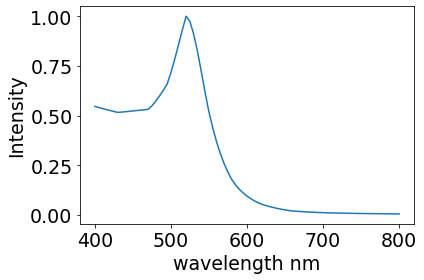

In [7]:
Radius = 5 #nm
step = 10
geometry = structures.sphere(step, R=Radius/step, mesh='cube')
simulate(geometry, step)

For simulating a **nanorod** choose the length and radius and run the code block:

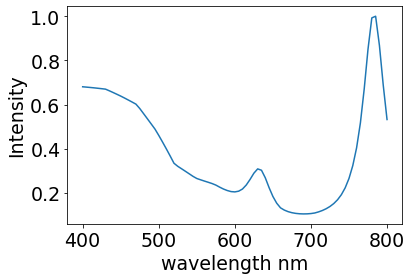

In [8]:
Length = 40 #nm
Radius = 1  #nm
step = 15
geometry = structures.nanorod(step, L = Length, R = Radius, mesh='cube')
simulate(geometry, step)

## References 

[1] https://www.sigmaaldrich.com/US/en/technical-documents/technical-article/materials-science-and-engineering/biosensors-and-imaging/gold-nanoparticles

[2] https://cdn.shopify.com/s/files/1/0259/2325/files/Tech_Specs_NanoHybrids_-_CTAB_stabilized_PEGylated_Gold_NanoRods_v181.pdf?385501948669141292

[3] Peter R. Wiecha, pyGDM -- A python toolkit for full-field electro-dynamical simulations and evolutionary optimization of nanostructures, 2018, arXiv:1802.04071